In [2]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA+Data.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [4]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [6]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,176.0,NaN,NaN,NaN,217.0,458.0,G-F,170,71,5ft 11in
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,77.0,NaN,NaN,NaN,97.0,202.0,G-F,170,71,5ft 11in
2,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,109.0,NaN,NaN,NaN,99.0,279.0,G,185,74,6ft 2in
3,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,115.0,NaN,NaN,NaN,98.0,152.0,G,185,74,6ft 2in
4,1952,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,70.0,NaN,NaN,NaN,56.0,126.0,G,185,74,6ft 2in


In [7]:

#remove 'unnamed' and position columns

complete_df = merged_df.drop(["position"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet)
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,176.0,NaN,NaN,NaN,217.0,458.0,170,71,5ft 11in
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,89.0,77.0,NaN,NaN,NaN,97.0,202.0,170,71,5ft 11in
2,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,109.0,NaN,NaN,NaN,99.0,279.0,185,74,6ft 2in
3,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,100.0,115.0,NaN,NaN,NaN,98.0,152.0,185,74,6ft 2in
4,1952,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,81.0,70.0,NaN,NaN,NaN,56.0,126.0,185,74,6ft 2in


In [8]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 2000
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet)
0,2000,Ron Mercer,SG,23.0,ORL,31.0,31.0,969.0,11.8,0.452,...,98.0,54.0,42.0,8.0,64.0,76.0,470.0,210,79,6ft 7in
1,2000,Jermaine O'Neal,C,21.0,POR,70.0,8.0,859.0,13.3,0.515,...,229.0,18.0,11.0,55.0,47.0,127.0,273.0,226,83,6ft 11in
2,2000,Andre Miller,PG,23.0,CLE,82.0,36.0,2093.0,17.9,0.517,...,280.0,476.0,84.0,17.0,166.0,194.0,914.0,200,75,6ft 3in
3,2000,Doug Christie,SG,29.0,TOR,73.0,73.0,2264.0,15.8,0.526,...,285.0,321.0,102.0,43.0,144.0,167.0,903.0,200,78,6ft 6in
4,2000,John Crotty,PG,30.0,DET,69.0,0.0,937.0,12.5,0.557,...,75.0,128.0,27.0,5.0,54.0,104.0,325.0,185,73,6ft 1in


In [9]:
desired_years_df.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)'],
      dtype='object')

In [10]:
dddd = desired_years_df.loc[desired_years_df["Pos"]=="PF"]

In [11]:
dddd2 = dddd.loc[dddd["Year"]==2000]

In [12]:
threeeeees = dddd2["3PA"].sum()
print(threeeeees)

3525.0


In [13]:
two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

In [14]:
center = two_thousand.loc[two_thousand["Pos"]== "C"]
forward = two_thousand.loc[two_thousand["Pos"]== "PF"]

In [15]:
two_thousand_one = desired_years_df.loc[desired_years_df["Year"]==2001]

In [16]:
center_1 = two_thousand_one.loc[two_thousand_one["Pos"]== "C"]
forward_1 = two_thousand_one.loc[two_thousand_one["Pos"]== "PF"]

In [17]:
two_thousand_two = desired_years_df.loc[desired_years_df["Year"]==2002]
center_2 = two_thousand_two.loc[two_thousand_two["Pos"]== "C"]
forward_2 = two_thousand_two.loc[two_thousand_two["Pos"]== "PF"]

In [18]:
two_thousand_three = desired_years_df.loc[desired_years_df["Year"]==2003]
center_3 = two_thousand_three.loc[two_thousand_three["Pos"]== "C"]
forward_3 = two_thousand_three.loc[two_thousand_three["Pos"]== "PF"]

In [19]:
two_thousand_four = desired_years_df.loc[desired_years_df["Year"]==2004]
center_4 = two_thousand_four.loc[two_thousand_four["Pos"]== "C"]
forward_4 = two_thousand_four.loc[two_thousand_four["Pos"]== "PF"]

In [20]:
two_thousand_five = desired_years_df.loc[desired_years_df["Year"]==2005]
center_5 = two_thousand_five.loc[two_thousand_five["Pos"]== "C"]
forward_5 = two_thousand_five.loc[two_thousand_five["Pos"]== "PF"]

In [21]:
two_thousand_six = desired_years_df.loc[desired_years_df["Year"]==2006]
center_6 = two_thousand_six.loc[two_thousand_six["Pos"]== "C"]
forward_6 = two_thousand_six.loc[two_thousand_six["Pos"]== "PF"]

In [22]:
two_thousand_seven = desired_years_df.loc[desired_years_df["Year"]==2007]
center_7 = two_thousand_seven.loc[two_thousand_seven["Pos"]== "C"]
forward_7 = two_thousand_seven.loc[two_thousand_seven["Pos"]== "PF"]

In [23]:
two_thousand_eight = desired_years_df.loc[desired_years_df["Year"]==2008]
center_8 = two_thousand_eight.loc[two_thousand_eight["Pos"]== "C"]
forward_8 = two_thousand_eight.loc[two_thousand_eight["Pos"]== "PF"]

In [24]:
two_thousand_nine = desired_years_df.loc[desired_years_df["Year"]==2009]
center_9 = two_thousand_nine.loc[two_thousand_nine["Pos"]== "C"]
forward_9 = two_thousand_nine.loc[two_thousand_nine["Pos"]== "PF"]

In [25]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]
center_10 = two_thousand_ten.loc[two_thousand_ten["Pos"]== "C"]
forward_10 = two_thousand_ten.loc[two_thousand_ten["Pos"]== "PF"]

In [26]:
two_thousand_eleven = desired_years_df.loc[desired_years_df["Year"]==2011]
center_11 = two_thousand_eleven.loc[two_thousand_eleven["Pos"]== "C"]
forward_11 = two_thousand_eleven.loc[two_thousand_eleven["Pos"]== "PF"]

In [27]:
two_thousand_twelve = desired_years_df.loc[desired_years_df["Year"]==2012]
center_12 = two_thousand_twelve.loc[two_thousand_twelve["Pos"]== "C"]
forward_12 = two_thousand_twelve.loc[two_thousand_twelve["Pos"]== "PF"]

In [28]:
two_thousand_thirteen = desired_years_df.loc[desired_years_df["Year"]==2013]
center_13 = two_thousand_thirteen.loc[two_thousand_thirteen["Pos"]== "C"]
forward_13 = two_thousand_thirteen.loc[two_thousand_thirteen["Pos"]== "PF"]

In [29]:
two_thousand_fourteen = desired_years_df.loc[desired_years_df["Year"]==2014]
center_14 = two_thousand_fourteen.loc[two_thousand_fourteen["Pos"]== "C"]
forward_14 = two_thousand_fourteen.loc[two_thousand_fourteen["Pos"]== "PF"]

In [30]:
two_thousand_fifteen = desired_years_df.loc[desired_years_df["Year"]==2015]
center_15 = two_thousand_fifteen.loc[two_thousand_fifteen["Pos"]== "C"]
forward_15 = two_thousand_fifteen.loc[two_thousand_fifteen["Pos"]== "PF"]

In [31]:
two_thousand_sixteen = desired_years_df.loc[desired_years_df["Year"]==2016]
center_16 = two_thousand_sixteen.loc[two_thousand_sixteen["Pos"]== "C"]
forward_16 = two_thousand_sixteen.loc[two_thousand_sixteen["Pos"]== "PF"]

In [32]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]
center_17 = two_thousand_seventeen.loc[two_thousand_seventeen["Pos"]== "C"]
forward_17 = two_thousand_seventeen.loc[two_thousand_seventeen["Pos"]== "PF"]

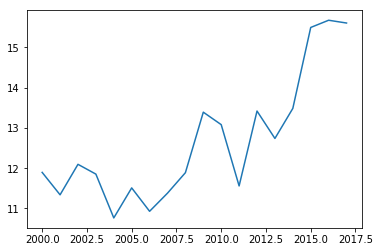

In [33]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["PER"].mean(),center_1["PER"].mean(),center_2["PER"].mean(), center_3["PER"].mean(), center_4["PER"].mean(), 
center_5["PER"].mean(), center_6["PER"].mean(), center_7["PER"].mean(), center_8["PER"].mean(), center_9["PER"].mean(),
center_10["PER"].mean(), center_11["PER"].mean(), center_12["PER"].mean(), center_13["PER"].mean(), center_14["PER"].mean(),
center_15["PER"].mean(),center_16["PER"].mean(),center_17["PER"].mean()]
plt.savefig("Logan_Images/PER Plot.png")
plt.plot(x,y)

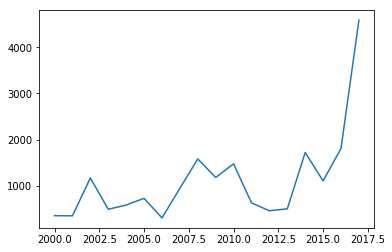

In [34]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["3PA"].sum(),center_1["3PA"].sum(),center_2["3PA"].sum(), center_3["3PA"].sum(), center_4["3PA"].sum(), 
center_5["3PA"].sum(), center_6["3PA"].sum(), center_7["3PA"].sum(), center_8["3PA"].sum(), center_9["3PA"].sum(),
center_10["3PA"].sum(), center_11["3PA"].sum(), center_12["3PA"].sum(), center_13["3PA"].sum(), center_14["3PA"].sum(),
center_15["3PA"].sum(),center_16["3PA"].sum(),center_17["3PA"].sum()]
plt.savefig("Logan_Images/3PA Plot.png")
plt.plot(x,y)

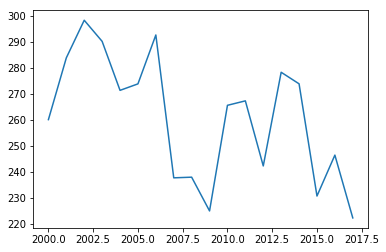

In [35]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["TRB"].mean(),forward_1["TRB"].mean(),forward_2["TRB"].mean(), forward_3["TRB"].mean(), forward_4["TRB"].mean(), 
forward_5["TRB"].mean(), forward_6["TRB"].mean(), forward_7["TRB"].mean(), forward_8["TRB"].mean(), forward_9["TRB"].mean(),
forward_10["TRB"].mean(), forward_11["TRB"].mean(), forward_12["TRB"].mean(), forward_13["TRB"].mean(), forward_14["TRB"].mean(),
forward_15["TRB"].mean(),forward_16["TRB"].mean(),forward_17["TRB"].mean()]
plt.savefig("Logan_Images/Forward TRB Plot.png")
plt.plot(x,y)

<BarContainer object of 18 artists>

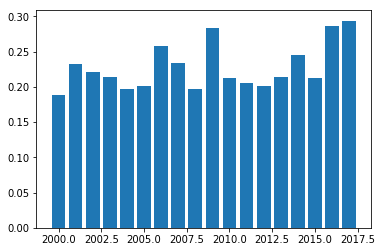

In [36]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["3P%"].mean(),forward_1["3P%"].mean(),forward_2["3P%"].mean(), forward_3["3P%"].mean(), forward_4["3P%"].mean(), 
forward_5["3P%"].mean(), forward_6["3P%"].mean(), forward_7["3P%"].mean(), forward_8["3P%"].mean(), forward_9["3P%"].mean(),
forward_10["3P%"].mean(), forward_11["3P%"].mean(), forward_12["3P%"].mean(), forward_13["3P%"].mean(), forward_14["3P%"].mean(),
forward_15["3P%"].mean(),forward_16["3P%"].mean(),forward_17["3P%"].mean()]
plt.savefig("Logan_Images/Forward 3P% Plot.png")
plt.bar(x,y)

In [37]:
forward_17.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet)
9599,2017,Derrick Williams,PF,25.0,MIA,25.0,11.0,377.0,10.1,0.465,...,73.0,14.0,9.0,5.0,14.0,33.0,148.0,240,80,6ft 8in
9601,2017,Derrick Williams,PF,25.0,TOT,50.0,11.0,804.0,10.6,0.537,...,130.0,28.0,14.0,7.0,28.0,60.0,304.0,240,80,6ft 8in
9612,2017,Markieff Morris,PF,27.0,WAS,76.0,76.0,2374.0,13.7,0.540,...,492.0,126.0,82.0,42.0,129.0,254.0,1063.0,245,82,6ft 10in
9622,2017,Derrick Williams,PF,25.0,CLE,25.0,0.0,427.0,11.1,0.628,...,57.0,14.0,5.0,2.0,14.0,27.0,156.0,240,80,6ft 8in
9623,2017,Josh Huestis,PF,25.0,OKC,2.0,0.0,31.0,26.1,0.612,...,9.0,3.0,0.0,3.0,0.0,0.0,14.0,230,79,6ft 7in


In [38]:
#Drop N/A values in 'Pos' column
#desired_years_df["Pos"] = complete_df.Pos.dropna()

#Groupby year

grouped_df = desired_years_df.groupby(['Year','Pos'])
avg_weight = grouped_df['weight'].mean()

#avg_weight_df = avg_weight_df.rename(columns={"Year":"Year",
                                             #"position":"Position",
                                             #"weight":"Weight"})

In [39]:
avg_weight.reset_index().head()

,Year,Pos,weight
0,2000,C,244.550000
1,2000,PF,234.312500
2,2000,PF-SF,220.000000
3,2000,PG,184.103774
4,2000,SF,217.153846


In [40]:
type(avg_weight)

pandas.core.series.Series

In [41]:
avg_weight_df = avg_weight.to_frame()

In [42]:
avg_weight_df.head()

weight
Year Pos              
2000 C      244.550000
     PF     234.312500
     PF-SF  220.000000
     PG     184.103774
     SF     217.153846

In [43]:
type(avg_weight_df)

pandas.core.frame.DataFrame

In [44]:
avg_weight_df = avg_weight_df.reset_index()

In [45]:
avg_weight_df.head()

,Year,Pos,weight
0,2000,C,244.550000
1,2000,PF,234.312500
2,2000,PF-SF,220.000000
3,2000,PG,184.103774
4,2000,SF,217.153846


In [46]:
c = avg_weight_df.loc[avg_weight_df["Pos"]=="C"]
f = avg_weight_df.loc[avg_weight_df["Pos"]=="PF"]

In [47]:
f.head()

,Year,Pos,weight
1,2000,PF,234.312500
10,2001,PF,233.816514
18,2002,PF,236.989247
24,2003,PF,239.674157
33,2004,PF,236.714286


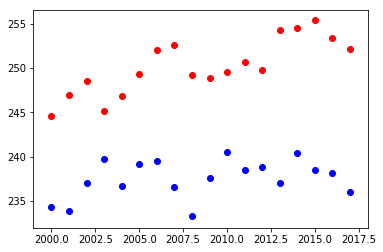

In [48]:
#Andrew
#this shows height and weight
plt.scatter(c["Year"], c["weight"], color = "red")
plt.scatter(f["Year"], f["weight"], color = "blue")
plt.show()

In [49]:
new_df = desired_years_df.groupby(['Year','Pos'])
avg_height = new_df["height (inches)"].mean()
avg_height.reset_index()

,Year,Pos,height (inches)
0,2000,C,83.575000
1,2000,PF,80.973214
2,2000,PF-SF,80.000000
3,2000,PG,73.905660
4,2000,SF,79.567308
5,2000,SF-PF,81.000000
6,2000,SF-SG,77.000000
7,2000,SG,77.100000
8,2001,C,83.520000
9,2001,C-PF,83.000000


In [50]:
avg_height_df = avg_height.to_frame()

In [51]:
logan = avg_height_df.reset_index()

In [52]:
logan

,Year,Pos,height (inches)
0,2000,C,83.575000
1,2000,PF,80.973214
2,2000,PF-SF,80.000000
3,2000,PG,73.905660
4,2000,SF,79.567308
5,2000,SF-PF,81.000000
6,2000,SF-SG,77.000000
7,2000,SG,77.100000
8,2001,C,83.520000
9,2001,C-PF,83.000000


In [53]:
test2 = logan.loc[logan["Pos"]=="C"]

In [54]:
test2

,Year,Pos,height (inches)
0,2000,C,83.575000
8,2001,C,83.520000
17,2002,C,83.495146
23,2003,C,83.242718
31,2004,C,83.365854
43,2005,C,83.267241
55,2006,C,83.176471
67,2007,C,83.182796
78,2008,C,83.295082
91,2009,C,83.274194


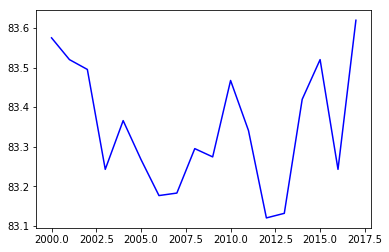

In [55]:
#plt.plot(test["Year"], test["weight"], color = "red")
plt.plot(test2["Year"], test2["height (inches)"], color = "blue")

In [56]:
# While height has remained relatively constant, weight has increased. 

In [57]:
##########################################################################################################################

In [58]:
#doing a group by to show number of shots (2vs3) by each team by year
second_grouped_df = desired_years_df.groupby(['Tm','Year'])
avg_twos = second_grouped_df['2PA'].sum()
avg_threes = second_grouped_df["3PA"].sum()


In [59]:
#average number of 2 point attempts by team by year
avg_twos

Tm   Year
ATL  2000    5420.0
     2001    5381.0
     2002    5416.0
     2003    6278.0
     2004    5280.0
     2005    5699.0
     2006    5342.0
     2007    5334.0
     2008    5474.0
     2009    4818.0
     2010    5346.0
     2011    5002.0
     2012    4018.0
     2013    4743.0
     2014    4572.0
     2015    4547.0
     2016    4700.0
     2017    5330.0
BOS  2000    5620.0
     2001    4852.0
     2002    4785.0
     2003    4354.0
     2004    5100.0
     2005    4663.0
     2006    5032.0
     2007    5171.0
     2008    4722.0
     2009    4978.0
     2010    4861.0
     2011    4902.0
              ...  
UTA  2008    5497.0
     2009    5501.0
     2010    5368.0
     2011    5334.0
     2012    4686.0
     2013    5325.0
     2014    5075.0
     2015    4737.0
     2016    4732.0
     2017    4386.0
VAN  2000    5543.0
     2001    5592.0
WAS  2000    5174.0
     2001    5451.0
     2002    4607.0
     2003    4111.0
     2004    5287.0
     2005    5286.0
     2006 

In [60]:
#average number of 3 point attempts by team by year
avg_threes

Tm   Year
ATL  2000     814.0
     2001     933.0
     2002    1194.0
     2003    1404.0
     2004    1249.0
     2005     973.0
     2006    1154.0
     2007    1038.0
     2008    1078.0
     2009    1633.0
     2010    1455.0
     2011    1427.0
     2012    1330.0
     2013    1901.0
     2014    2116.0
     2015    2152.0
     2016    2469.0
     2017    2631.0
BOS  2000    1260.0
     2001    1633.0
     2002    1946.0
     2003    2155.0
     2004    1825.0
     2005    1123.0
     2006    1290.0
     2007    1283.0
     2008    1564.0
     2009    1355.0
     2010    1433.0
     2011    1119.0
              ...  
UTA  2008    1095.0
     2009    1122.0
     2010    1207.0
     2011    1256.0
     2012     845.0
     2013    1385.0
     2014    1577.0
     2015    1819.0
     2016    2055.0
     2017    2128.0
VAN  2000     898.0
     2001     947.0
WAS  2000     650.0
     2001     716.0
     2002     733.0
     2003     756.0
     2004    1269.0
     2005    1498.0
     2006 

In [61]:
#creating a DF of average number of 2's and 3's COMBINED for each year in the NBA
shot_type = desired_years_df.groupby(['Year'])

In [62]:
sum_twos = shot_type['2PA'].sum()
sum_threes = shot_type["3PA"].sum()

In [63]:
sum_twos

Year
2000    157071.0
2001    161385.0
2002    155925.0
2003    154995.0
2004    169664.0
2005    171431.0
2006    163713.0
2007    160776.0
2008    168439.0
2009    168261.0
2010    172189.0
2011    178364.0
2012    133778.0
2013    164546.0
2014    166571.0
2015    172234.0
2016    160038.0
2017    157314.0
Name: 2PA, dtype: float64

In [64]:
sum_threes

Year
2000    32300.0
2001    33132.0
2002    36084.0
2003    36055.0
2004    39045.0
2005    43393.0
2006    42477.0
2007    44387.0
2008    48417.0
2009    50463.0
2010    49262.0
2011    53211.0
2012    38474.0
2013    53046.0
2014    59197.0
2015    64253.0
2016    64288.0
2017    73989.0
Name: 3PA, dtype: float64

In [65]:
#grouping 2PA by year
twos = desired_years_df.groupby("Pos")

In [66]:
twos_yearly = desired_years_df.groupby(["Year", "Pos"])
two_attemps = twos_yearly["2PA"].sum()
two_attemps.reset_index()

,Year,Pos,2PA
0,2000,C,23805.0
1,2000,PF,36035.0
2,2000,PF-SF,324.0
3,2000,PG,28135.0
4,2000,SF,40285.0
5,2000,SF-PF,67.0
6,2000,SF-SG,395.0
7,2000,SG,28025.0
8,2001,C,25357.0
9,2001,C-PF,538.0


In [68]:
#grouping 3PA by year
threes = desired_years_df.groupby("Pos")

In [69]:
threes_yearly = desired_years_df.groupby(["Year", "Pos"])
three_attemps = threes_yearly["3PA"].sum()
three_attemps.reset_index()

,Year,Pos,3PA
0,2000,C,352.0
1,2000,PF,3525.0
2,2000,PF-SF,34.0
3,2000,PG,10048.0
4,2000,SF,8726.0
5,2000,SF-PF,1.0
6,2000,SF-SG,101.0
7,2000,SG,9513.0
8,2001,C,348.0
9,2001,C-PF,13.0


In [70]:
#extracting number of made 3's by position by year
threes = desired_years_df.groupby("Pos")

In [71]:
threes_yearly = desired_years_df.groupby(["Year", "Pos"])
three_makes = threes_yearly["3PA"].sum()
three_makes.reset_index()

,Year,Pos,3PA
0,2000,C,352.0
1,2000,PF,3525.0
2,2000,PF-SF,34.0
3,2000,PG,10048.0
4,2000,SF,8726.0
5,2000,SF-PF,1.0
6,2000,SF-SG,101.0
7,2000,SG,9513.0
8,2001,C,348.0
9,2001,C-PF,13.0


In [73]:
#isolating percentages of 3PA made by position by year
threes_yearly = desired_years_df.groupby(["Year", "Pos"])
three_per = threes_yearly["3P%"].sum()
three_per.reset_index()

,Year,Pos,3P%
0,2000,C,6.410
1,2000,PF,14.136
2,2000,PF-SF,0.324
3,2000,PG,32.308
4,2000,SF,26.165
5,2000,SF-PF,0.000
6,2000,SF-SG,0.317
7,2000,SG,22.644
8,2001,C,4.981
9,2001,C-PF,0.308


In [74]:
#player efficency rating by position by year(max)
#i chose to isolate it by the max here just to show how big men are more effienct. next cell below will calculate total by position.
per = desired_years_df.groupby(["Year", "Pos"])
pos_per = per["PER"].max()
pos_per.reset_index()

,Year,Pos,PER
0,2000,C,25.6
1,2000,PF,24.8
2,2000,PF-SF,10.0
3,2000,PG,44.0
4,2000,SF,25.2
5,2000,SF-PF,6.5
6,2000,SF-SG,10.8
7,2000,SG,21.7
8,2001,C,20.9
9,2001,C-PF,17.0


In [75]:
#player efficency rating by position by year (sum)
per = desired_years_df.groupby(["Year", "Pos"])
pos_per = per["PER"].sum()
pos_per.reset_index()

,Year,Pos,PER
0,2000,C,951.6
1,2000,PF,1279.8
2,2000,PF-SF,10.0
3,2000,PG,1324.5
4,2000,SF,1318.3
5,2000,SF-PF,6.5
6,2000,SF-SG,10.8
7,2000,SG,954.6
8,2001,C,1133.9
9,2001,C-PF,17.0


In [76]:
#player efficency rating by position by year (mean)
per = desired_years_df.groupby(["Year", "Pos"])
pos_per = per["PER"].mean()
pos_per.reset_index()

,Year,Pos,PER
0,2000,C,11.895000
1,2000,PF,11.426786
2,2000,PF-SF,10.000000
3,2000,PG,12.495283
4,2000,SF,12.675962
5,2000,SF-PF,6.500000
6,2000,SF-SG,10.800000
7,2000,SG,11.932500
8,2001,C,11.339000
9,2001,C-PF,17.000000


In [77]:
#mintues played by position
min = desired_years_df.groupby(["Year", "Pos"])
min_per = per["MP"].mean()
min_per.reset_index()

,Year,Pos,MP
0,2000,C,1035.475000
1,2000,PF,1096.312500
2,2000,PF-SF,1305.000000
3,2000,PG,1104.943396
4,2000,SF,1296.846154
5,2000,SF-PF,309.000000
6,2000,SF-SG,1166.000000
7,2000,SG,1279.650000
8,2001,C,943.400000
9,2001,C-PF,1663.000000


In [78]:
#looking at average assist numbers by pos
#player efficency rating by position by year (mean)
assist = desired_years_df.groupby(["Year", "Pos"])
assist_per = assist["AST"].mean()
assist_per.reset_index()

,Year,Pos,AST
0,2000,C,41.887500
1,2000,PF,64.160714
2,2000,PF-SF,97.000000
3,2000,PG,195.056604
4,2000,SF,100.423077
5,2000,SF-PF,14.000000
6,2000,SF-SG,84.000000
7,2000,SG,115.512500
8,2001,C,34.160000
9,2001,C-PF,124.000000


In [79]:
#looking at win shares by position by year
win_share = desired_years_df.groupby(["Year", "Pos"])
ws_pos = win_share["WS"].sum()
ws_pos.reset_index()

,Year,Pos,WS
0,2000,C,158.0
1,2000,PF,260.5
2,2000,PF-SF,1.2
3,2000,PG,209.1
4,2000,SF,288.6
5,2000,SF-PF,0.0
6,2000,SF-SG,-0.3
7,2000,SG,197.9
8,2001,C,184.6
9,2001,C-PF,4.3


In [80]:
############################3/26##############################################

In [81]:
#if statement grouping all big men into a new column called 'Big Men'
#groupby 'big men' and then grab only values for each year you need
# create a dataframe that only grabs the column 'big men'

#desired_years_df["bm"] = desired_years_df.eval("position == 'C' or 'position' == 'F' or position == 'F-C' or positon == 'C-F'") # , 
#                                                inplace = True)


def f(row):
    if row ['Pos'] == 'C' or row ['Pos'] == 'PF':
        val = 'bm'
    else: 
        val = 'sm' 
    return val

desired_years_df['bm'] = desired_years_df.apply(f, axis = 1)

#print(desired_years_df[['position','bm']])
type(desired_years_df)
desired_years_df.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)',
       'bm'],
      dtype='object')

In [82]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_df.head()
type(sm_df)

sm_df.groups
sm_df.MP.mean()

Year  bm
2000  bm    1070.963542
      sm    1218.935154
2001  bm    1073.043062
      sm    1182.442308
2002  bm    1100.020408
      sm    1238.106164
2003  bm    1103.661458
      sm    1299.787234
2004  bm     994.670683
      sm    1187.445122
2005  bm    1018.025532
      sm    1195.029240
2006  bm    1051.843049
      sm    1183.938053
2007  bm    1076.533937
      sm    1306.962963
2008  bm     991.092369
      sm    1140.198300
2009  bm     984.613169
      sm    1221.096774
2010  bm    1094.372197
      sm    1159.859155
2011  bm     992.247967
      sm    1162.417755
2012  bm     837.783550
      sm     966.966565
2013  bm    1060.182609
      sm    1142.727794
2014  bm    1029.133047
      sm    1091.700521
2015  bm    1025.423868
      sm    1035.646081
2016  bm    1023.968889
      sm    1152.130919
2017  bm    1013.579399
      sm    1141.646739
Name: MP, dtype: float64

In [83]:

y = sm_df.MP.mean()
sample = y.reset_index()

sample.head()
#plt.bar(sample['Year'], sample.MP)

sample_bm = sample.loc[sample["bm"]=="bm"]

In [84]:
sample_bm

,Year,bm,MP
0,2000,bm,1070.963542
2,2001,bm,1073.043062
4,2002,bm,1100.020408
6,2003,bm,1103.661458
8,2004,bm,994.670683
10,2005,bm,1018.025532
12,2006,bm,1051.843049
14,2007,bm,1076.533937
16,2008,bm,991.092369
18,2009,bm,984.613169


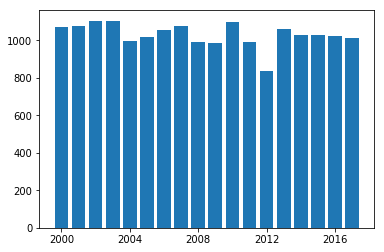

<Figure size 7200x7200 with 0 Axes>

In [85]:
plt.bar(sample_bm['Year'],sample_bm['MP'])
plt.xticks(np.arange(2000,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [86]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_df.head()
sm_df.groups

#isolating free throw attempts
sm_df.PER.mean()

Year  bm
2000  bm    11.621875
      sm    12.370990
2001  bm    11.791388
      sm    11.710256
2002  bm    12.729082
      sm    12.231507
2003  bm    11.834896
      sm    12.001773
2004  bm    11.988353
      sm    11.774695
2005  bm    12.674894
      sm    12.000877
2006  bm    11.861261
      sm    11.712130
2007  bm    11.827149
      sm    12.213805
2008  bm    12.252209
      sm    11.606818
2009  bm    13.865432
      sm    11.824633
2010  bm    13.050673
      sm    12.044350
2011  bm    12.132520
      sm    12.198172
2012  bm    13.453680
      sm    12.247416
2013  bm    13.392609
      sm    11.320115
2014  bm    13.270815
      sm    11.604687
2015  bm    14.398354
      sm    11.363658
2016  bm    14.899556
      sm    12.188022
2017  bm    14.112446
      sm    11.856522
Name: PER, dtype: float64

In [92]:
y = sm_df.PER.mean() 
per = y.reset_index()

per.head()

#plt.bar(sample['Year'], sample.MP)

per_bm = per.loc[per["bm"]=="bm"] 
per_sm = per.loc[per["bm"]=="sm"]

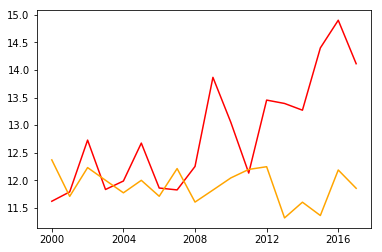

<Figure size 7200x7200 with 0 Axes>

In [93]:
#Andrew
plt.plot(per_bm['Year'],per_bm['PER'], color = "red")
plt.plot(per_sm["Year"], per_sm["PER"], color = "orange")
plt.xticks(np.arange(2000,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [94]:
y = sm_df["3PA"].sum()
three_attempts = y.reset_index()

three_attempts.head()
#plt.bar(sample['Year'], sample.MP)

threes_bm = three_attempts.loc[three_attempts["bm"]=="bm"]
threes_sm = three_attempts.loc[three_attempts["bm"]=="sm"]

In [95]:
threes_bm.head()

,Year,bm,3PA
0,2000,bm,3877.0
2,2001,bm,4403.0
4,2002,bm,4702.0
6,2003,bm,4526.0
8,2004,bm,5075.0


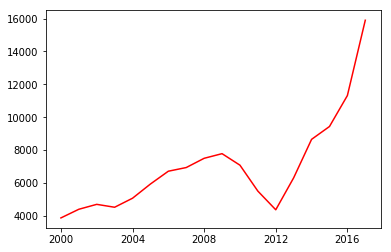

<Figure size 7200x7200 with 0 Axes>

In [96]:
#Andrew
plt.plot(threes_bm['Year'],threes_bm['3PA'], color = "red")
#plt.plot(per_sm["Year"], per_sm["PER"], color = "orange")
plt.xticks(np.arange(2000,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [97]:
 
sm_df = desired_years_df.groupby(['Year','bm'])
x = sm_df

#sm_df.groups
sm_df.Age.mean()

Year  bm
2000  bm    27.614583
      sm    27.300341
2001  bm    27.516746
      sm    27.772436
2002  bm    26.714286
      sm    27.332192
2003  bm    27.354167
      sm    26.666667
2004  bm    27.253012
      sm    27.079268
2005  bm    27.251064
      sm    27.026316
2006  bm    26.578475
      sm    26.610619
2007  bm    26.484163
      sm    26.340067
2008  bm    26.859438
      sm    26.832861
2009  bm    26.670782
      sm    26.692082
2010  bm    26.887892
      sm    26.588732
2011  bm    26.780488
      sm    26.642298
2012  bm    26.709957
      sm    26.574468
2013  bm    26.591304
      sm    26.498567
2014  bm    26.613734
      sm    26.356771
2015  bm    26.765432
      sm    26.296912
2016  bm    27.231111
      sm    26.582173
2017  bm    26.197425
      sm    26.597826
Name: Age, dtype: float64

In [98]:

x = sm_df.Age.mean()
age = x.reset_index()

age.head()
#plt.bar(sample['Year'], sample.MP)

age_bm = age.loc[age["bm"]=="bm"]
age_sm = age.loc[age["bm"]=="sm"]

In [99]:

x_2 = sm_df.PER.mean()
PER_2 = x_2.reset_index()

PER_2.head()
#plt.bar(sample['Year'], sample.MP)

per2_bm = PER_2.loc[PER_2["bm"]=="bm"]
per2_sm = PER_2.loc[PER_2["bm"]=="sm"]


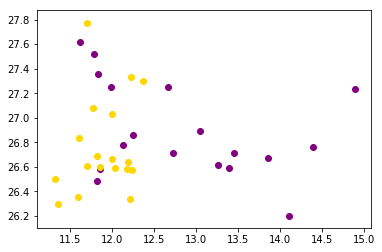

In [100]:
#needswork code above is for this plot i was attempting
plt.scatter(per2_bm["PER"], age_bm["Age"], color= "purple")
plt.scatter(per2_sm["PER"], age_sm["Age"], color= "gold")